# Import Python libraries and directory of results

In [261]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import statsmodels.api as sm
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
#from ITS_lib.ITS_functions import ITS_plot, ITS_subplots

In [262]:
#from google.colab import drive
#drive.mount("/content/drive")

#!pip install pingouin

#!pip install statannotations
#!pip install statsmodels
#!pip install scikit_posthocs

In [263]:
from pathlib import Path

#DATA = Path("/content/drive/My Drive/BBL/GP_ITS")
DATA = Path("C:/Users/Teo/Downloads")

# Create one table with histo results

In [289]:
ITS = pd.read_csv(DATA / 'result_gp_histo.txt', sep = '\t', header = None)
ITS.columns = ['Filename','Blinded','Single_nucleated', 'Multi_nucleated', 'BS', 'OS']
ITS['OS/BS'] = ITS.apply(
    lambda row:(row.OS)/(row.BS), axis=1)
ITS['single_number/BS'] = ITS.apply(
    lambda row:(row.Single_nucleated)/(row.BS), axis=1)
ITS['multi_number/BS'] = ITS.apply(
    lambda row:(row.Multi_nucleated)/(row.BS), axis=1)
ITS['ID'] = ITS['Filename'].astype(str).str.split('_').str[0]
ITS['Location'] = ITS['Filename'].astype(str).str.split('_').str[1]
ITS['Subregion'] = ITS['Filename'].astype(str).str.split('_').str[3]
ITS['Location_Subregion'] = ITS['Location'] + '_' + ITS['Subregion']
ITS.head()

,Filename,Blinded,Single_nucleated,Multi_nucleated,BS,OS,OS/BS,single_number/BS,multi_number/BS,ID,Location,Subregion,Location_Subregion
0,GP11_RF_21_LAT_40x_21.tif,1,6.0,1.0,3689.207522,460.731526,0.124886,0.001626,0.000271,GP11,RF,LAT,RF_LAT
1,GP11_RF_21_LAT_40x_33.tif,2,2.0,0.0,2122.168126,71.113694,0.033510,0.000942,0.000000,GP11,RF,LAT,RF_LAT
2,GP11_RF_21_LAT_40x_31.tif,3,1.0,2.0,3098.195472,250.663076,0.080906,0.000323,0.000646,GP11,RF,LAT,RF_LAT
3,GP11_RT_10_MED_40x_25.tif,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GP11,RT,MED,RT_MED
4,GP11_RT_10_MED_40x_31.tif,5,3.0,0.0,2643.795213,270.968813,0.102492,0.001135,0.000000,GP11,RT,MED,RT_MED


In [296]:
ITS = pd.read_csv(DATA / 'result_gp_tolblue.txt', sep = '\t', header = None)
ITS.columns = ['Filename','ID','Location','Subregion_lower', 'Subregion','slide','blinded','Tiffany','Kangle','Average','Age']
#ITS['ID'] = ITS['Filename'].astype(str).str.split('_').str[0]
#ITS['Location'] = ITS['Filename'].astype(str).str.split('_').str[1]
#ITS['Subregion'] = ITS['Filename'].astype(str).str.split('_').str[3]
ITS['Location_Subregion'] = ITS['Location'] + '_' + ITS['Subregion']
ITS.head()

,Filename,ID,Location,Subregion_lower,Subregion,slide,blinded,Tiffany,Kangle,Average,Age,Location_Subregion
0,'GP1_LF_lat_slide4_20X_28.tif',GP1,LF,lat,LAT,slide4,56,2.0,0,1.0,5,LF_LAT
1,'GP1_LF_med_slide4_20X_14.tif',GP1,LF,med,MED,slide4,51,3.0,4,3.5,5,LF_MED
2,'GP1_LT_lat_slide1_20X_136.tif',GP1,LT,lat,LAT,slide1,42,2.0,1,1.5,5,LT_LAT
3,'GP1_LT_med_slide2_20X_153.tif',GP1,LT,med,MED,slide2,8,7.0,8,7.5,5,LT_MED
4,'GP1_RT_lat_slide11_20X_40.tif',GP1,RT,lat,LAT,slide11,67,6.0,3,4.5,5,RT_LAT


In [300]:
ITS.groupby(['Location_Subregion', 'Age']).mean()

blinded   Tiffany    Kangle   Average
Location_Subregion Age                                         
LF_LAT             5    56.000000  2.000000  0.000000  1.000000
LF_MED             5    51.000000  3.000000  4.000000  3.500000
LT_LAT             5    42.000000  2.000000  1.000000  1.500000
LT_MED             5     8.000000  7.000000  8.000000  7.500000
RF_LAT             2    57.000000  3.500000  3.166667  3.125000
                   3    63.857143  4.500000  3.714286  5.375000
                   4    45.600000  5.666667  4.200000  5.500000
                   5    44.833333  3.333333  5.500000  4.416667
RF_MED             2    59.857143  2.250000  2.857143  2.000000
                   3    63.750000  2.750000  2.916667  2.875000
                   4    45.250000  4.666667  3.000000  4.083333
                   5    28.800000  1.800000  1.200000  1.500000
RT_LAT             3    46.000000  3.500000  4.000000  4.000000
                   4    34.250000  2.625000  1.875000  2.250000
                   5    58.750000  5.000000  3.500000  4.250000
RT_MED             3    24.000000  1.500000  1.000000  1.250000
                   4    33.571429  3.571429  3.285714  3.428571
                   5    40.500000  3.500000  3.666667  3.583333

In [290]:
GP_ID = pd.read_csv(DATA /'GP_fileID_histo.txt', header = None, sep = '\t')
GP_ID.columns = ['GP','Month']
GP_ID.head()

,GP,Month
0,GP5,2
1,GP6,2
2,GP7,2
3,GP8,3
4,GP9,4


In [291]:
ITS_merge = pd.merge(ITS, GP_ID, left_on = 'ID', right_on = 'GP')
ITS_merge.head()

,Filename,Blinded,Single_nucleated,Multi_nucleated,BS,OS,OS/BS,single_number/BS,multi_number/BS,ID,Location,Subregion,Location_Subregion,GP,Month
0,GP11_RF_21_LAT_40x_21.tif,1,6.0,1.0,3689.207522,460.731526,0.124886,0.001626,0.000271,GP11,RF,LAT,RF_LAT,GP11,5
1,GP11_RF_21_LAT_40x_33.tif,2,2.0,0.0,2122.168126,71.113694,0.033510,0.000942,0.000000,GP11,RF,LAT,RF_LAT,GP11,5
2,GP11_RF_21_LAT_40x_31.tif,3,1.0,2.0,3098.195472,250.663076,0.080906,0.000323,0.000646,GP11,RF,LAT,RF_LAT,GP11,5
3,GP11_RT_10_MED_40x_25.tif,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GP11,RT,MED,RT_MED,GP11,5
4,GP11_RT_10_MED_40x_31.tif,5,3.0,0.0,2643.795213,270.968813,0.102492,0.001135,0.000000,GP11,RT,MED,RT_MED,GP11,5


In [297]:
ITS_merge.groupby(['Location_Subregion', 'Month']).mean()

Blinded  Single_nucleated  Multi_nucleated  \
Location_Subregion Month                                                 
RF_LAT             3      24.333333          3.666667         2.000000   
                   5       7.857143          2.142857         0.714286   
RF_MED             3      28.000000          3.500000         2.000000   
                   5      10.166667          3.833333         1.000000   
RT_LAT             3      29.000000          4.500000         1.000000   
                   4      26.666667          7.000000         2.000000   
RT_MED             3      22.500000          3.000000         0.500000   
                   4      24.500000          4.333333         2.500000   
                   5       6.666667          6.500000         2.000000   

                                   BS          OS     OS/BS  single_number/BS  \
Location_Subregion Month                                                        
RF_LAT             3      3528.952703  386.128311  0.112912          0.001174   
                   5      2934.639371  230.605141  0.077626          0.000732   
RF_MED             3      3588.367353  327.713219  0.089857          0.000970   
                   5      2818.327360  373.750691  0.125879          0.001367   
RT_LAT             3      3892.836016  478.180197  0.166504          0.001215   
                   4      2591.520925  721.823334  0.299484          0.003112   
RT_MED             3      2077.534028  387.343509  0.191627          0.001471   
                   4      2996.746390  553.422958  0.189329          0.001483   
                   5      3525.945834  814.606851  0.205309          0.001702   

                          multi_number/BS  
Location_Subregion Month                   
RF_LAT             3             0.000739  
                   5             0.000211  
RF_MED             3             0.000539  
                   5             0.000317  
RT_LAT             3             0.000450  
                   4             0.000875  
RT_MED             3             0.000279  
                   4             0.000883  
                   5             0.000454

In [298]:
ITS_merge.groupby(['Location_Subregion', 'Month']).std()

Blinded  Single_nucleated  Multi_nucleated  \
Location_Subregion Month                                                
RF_LAT             3      4.041452          0.577350         1.000000   
                   5      6.362090          1.864454         0.755929   
RF_MED             3      8.485281          0.707107         1.414214   
                   5      2.786874          2.483277         1.264911   
RT_LAT             3      4.242641          2.121320         1.414214   
                   4      4.932883          0.000000         1.000000   
RT_MED             3      6.363961          0.000000         0.707107   
                   4      6.379655          3.669696         1.760682   
                   5      3.785939          4.949747         2.828427   

                                   BS          OS     OS/BS  single_number/BS  \
Location_Subregion Month                                                        
RF_LAT             3      1766.316902  154.730431  0.019948          0.000405   
                   5       791.173776  117.718804  0.029877          0.000510   
RF_MED             3       380.417610  133.650716  0.027719          0.000094   
                   5       687.126245  283.673131  0.068398          0.000890   
RT_LAT             3      2365.691178  165.558477  0.143714          0.000193   
                   4      1029.616002  278.688633  0.112990          0.001559   
RT_MED             3       400.502968   34.968475  0.053773          0.000284   
                   4       877.459331  191.813093  0.053654          0.001020   
                   5      1247.549372  768.820287  0.145404          0.000802   

                          multi_number/BS  
Location_Subregion Month                   
RF_LAT             3             0.000690  
                   5             0.000236  
RF_MED             3             0.000337  
                   5             0.000361  
RT_LAT             3             0.000637  
                   4             0.000532  
RT_MED             3             0.000394  
                   4             0.000710  
                   5             0.000642

### Add code to save merged dataframe and can start with that

## Filter by individual GP

In [137]:
def label_cohort (row):
   if row['GP'] == 'GP_10':
      return 5
   if row['GP'] == 'GP_11':
      return 5
   if row['GP'] == 'GP_12':
      return 5
   if row['GP'] == 'GP_13':
      return 4
   if row['GP'] == 'GP_14':
      return 4
   if row['GP'] == 'GP_15':
      return 4
   if row['GP'] == 'GP_8':
      return 3
   if row['GP'] == 'GP_9':
      return 3
   if row['GP'] == 'GP_16':
      return 3
   if row['GP'] == 'GP_17':
      return 3
   return 0

In [138]:
ITS_merge['Cohort'] = ITS_merge.apply(lambda row: label_cohort(row), axis=1)

In [139]:
ITS_merge['GP_Location_Subregion'] = ITS_merge['GP'] + '_' + ITS_merge['Location_Subregion']

In [140]:
ITS_erode_RT_MED = ITS_merge[(ITS_merge.Location_Subregion == "RT_MED")]

In [141]:
ITS_erode_RT_MED.groupby(['GP', 'Month']).mean()

Thickness  Porosity          BMD          TMD  Cohort
GP    Month                                                       
GP_10 2         0.1446  0.193494   982.034077  1211.728012       5
      3         0.2976  0.220531   992.584060  1266.438423       5
      4         0.3243  0.221924  1044.528148  1335.421439       5
      5         0.2374  0.069232  1679.945869  1803.069656       5
GP_11 3         0.3102  0.145073  1155.866665  1347.825076       5
      4         0.2750  0.171932  1161.073406  1397.031073       5
      5         0.1901  0.120319  1517.626240  1721.830562       5
GP_12 2         0.2260  0.165613          NaN          NaN       5
      3         0.2503  0.238783   947.348096  1236.786998       5
      4         0.3041  0.119437          NaN          NaN       5
      5         0.2956  0.040218  1654.722103  1722.293739       5

In [142]:
ITS_erode_RT_MED.groupby(['Cohort', 'Month']).mean()

Thickness  Porosity          BMD          TMD
Cohort Month                                               
5      2       0.185300  0.179554   982.034077  1211.728012
       3       0.286033  0.201462  1031.932940  1283.683499
       4       0.301133  0.171098  1102.800777  1366.226256
       5       0.241033  0.076590  1617.431404  1749.064652

In [143]:
import scipy.stats as stats

stats.f_oneway(ITS_erode_RT_MED['Thickness'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['Thickness'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['Thickness'][ITS_erode_RT_MED['Cohort'] == 5])

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [144]:
stats.f_oneway(ITS_erode_RT_MED['Porosity'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['Porosity'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['Porosity'][ITS_erode_RT_MED['Cohort'] == 5])

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [145]:
stats.f_oneway(ITS_erode_RT_MED['TMD'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['TMD'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['TMD'][ITS_erode_RT_MED['Cohort'] == 5])

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [146]:
stats.f_oneway(ITS_erode_RT_MED['BMD'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['BMD'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['BMD'][ITS_erode_RT_MED['Cohort'] == 5])

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

# Cartilage thickness

In [ ]:
GP_measurements = pd.read_csv(DATA /'gp_measurements.txt', header = None, sep = '\t')
GP_measurements.columns = ['GP','Sample','ID']

In [ ]:
GP_cartilage_thickness= pd.read_csv(DATA /'gp_cartilage_thickness.txt', header = None, sep = '\t')
GP_cartilage_thickness.columns = ['Sample','Cart_LAT_thickness','Cart_MED_thickness']

In [ ]:
GP_merge = pd.merge(GP_cartilage_thickness, GP_measurements, left_on = 'Sample', right_on = 'Sample')
GP_merge.head()

In [ ]:
ITS_erode_merge = pd.merge(ITS_erode_merge, GP_merge, left_on = 'ID', right_on = 'ID')
ITS_erode_merge.head()

In [ ]:
ITS_erode_merge.to_csv(DATA /'GP_right.txt', sep = '\t')

In [ ]:
ax = sns.barplot(data = ITS_erode_merge, x='Location_Subregion', y='Cart_LAT_thickness', hue='Month', estimator=np.mean, ci = 68, capsize=.2)
ax.legend_.remove()
pairs=[('RF_LAT', 'RF_MED'), ('RF_LAT', 'RT_LAT'), ('RF_LAT', 'RT_MED'),('RF_MED',  'RT_LAT'), ('RF_MED', 'RT_MED'), ('RT_LAT', 'RT_MED')]

annotator = Annotator(ax, pairs, data=ITS_erode_merge, x='Location_Subregion', y='Cart_LAT_thickness')
annotator.configure(test='t-test_paired', text_format='star', loc='outside')
#annotator.apply_and_annotate()

# Statistical Analysis

In [ ]:
print(pg.normality(ITS_erode_merge))

## Longitudinal Analyses

In [ ]:
ITS_erode_merge.rm_anova(dv='PR_ratio',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='PR_ratio',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='sidak', data = ITS_erode_merge)
post_hocs

In [ ]:
ITS_erode_merge.rm_anova(dv='rTb_N',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='rTb_N',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='BH', data = ITS_erode_merge)
post_hocs

In [ ]:
ITS_erode_merge.rm_anova(dv='pTb_Th',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='pTb_Th',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='bonferroni', data = ITS_erode_merge)
post_hocs

## Cross-sectional Analyses

In [ ]:
PR_model = ols('PR_ratio ~ C(Location_Subregion) + C(Month) + C(Location_Subregion):C(Month)', data=ITS_erode_merge).fit()

sm.stats.anova_lm(PR_model,typ=2)

In [ ]:
sp.posthoc_ttest(ITS_erode_merge, val_col='PR_Ratio', group_col='Month', p_adjust='holm')

# Plot ITS results - line graphs


In [ ]:
plt.style.use('seaborn-bright')
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 20}) 
import numpy as np

In [ ]:
ITS_erode_RT_MED["Month"] = ITS_erode_RT_MED["Month"].astype(str)

#hue_order = list(['3', '4', '5'])
#order = ["RF_LAT", "RF_MED", "RT_LAT","RT_MED"]
#order = ["LF_LAT", "LF_MED", "LT_LAT","LT_MED","RF_LAT", "RF_MED", "RT_LAT","RT_MED"]


hue_plot_params = {
    'data': ITS_erode_RT_MED,
    'x': 'Month',
  #  "order": order,
    "hue": "GP_Location_Subregion",
    #"hue_order": "RT_MED"
    #"hue_order": order
}

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='PR_ratio')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='BV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='pBV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rBV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rTb_N')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rTb_Th')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='pTb_Th')

# Plot ITS results bar graphs


In [251]:
plt.style.use('seaborn-muted')
#plt.style.use('dark_background')
#plt.style.use('seaborn-bright')
#plt.style.use('grayscale')
#colors=['darkgray','gray','dimgray','lightgray']
#plt.style.use('seaborn-Greys')

In [252]:
#plt.rcParams["figure.figsize"] = (5.5, 4)
#plt.rcParams["figure.figsize"] = (16.5,6.2)
plt.rcParams["figure.figsize"] = (16.5,16.5)
#plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams.update({'font.size': 20}) # 'font.weight' : 'bold', 'axes.labelweight': 'bold'})

In [253]:
import numpy as np

In [254]:
ITS_merge["Month"] = ITS_merge["Month"].astype(str)
#ITS_merge_5months["Month"] = ITS_merge_5months["Month"].astype(str)

hue_order = list(['2', '3', '4', '5'])
#order = ["RF_LAT", "RF_MED", "RT_LAT","RT_MED"]
order = ["LF_LAT", "LF_MED", "LT_LAT","LT_MED","RF_LAT", "RF_MED", "RT_LAT","RT_MED"]


hue_plot_params = {
    'data': ITS_merge,
    'x': 'Location_Subregion',
    "order": order,
    "hue": "Month",
    "hue_order": hue_order
}

In [255]:
import seaborn as sns

def ITS_plot(ITS_param):
    ax = sns.barplot(**hue_plot_params, y=ITS_param, estimator=np.mean, ci=68, capsize=.2, errcolor='black') 
    #,fill=False)
    ax = sns.stripplot(**hue_plot_params, y=ITS_param, color='black', dodge=True)
    
    #ax = sns.barplot(**hue_plot_params, y=ITS_param, estimator=np.mean, ci=68, capsize=.2, errcolor='black') #,fill=False)
    #ax = sns.swarmplot(**hue_plot_params, y=ITS_param, color='black', dodge=True)
    
    ax.set(xlabel = 'Location')
    ax.set(ylabel = '')
    ax.set(title = ITS_param)

    ax.legend_.remove()
    #ax.legend(loc='upper center',ncol=4)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    annotator = Annotator(ax, pairs, **hue_plot_params, y=ITS_param,show_non_significant=False)
    annotator.configure(test='t-test_ind', comparisons_correction='BH', correction_format="replace", text_format='star', color='black', loc='inside',pvalue_thresholds=[[1e-4, "*"], [1e-3, "*"], [1e-2, "*"], [0.05, "*"],[1, ""]])
    annotator.apply_and_annotate()
 
    img_name = str(DATA) + "/ITS_" + ITS_param + ".png"
    plt.tight_layout()

    plt.savefig(img_name, bbox_inches = "tight")


In [256]:
def ITS_subplots(ITS_param1, ITS_param2, ITS_param3, ITS_param4):
    plt.subplot(2,2,1)
    ITS_plot(ITS_param1)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(2,2,2)
    ITS_plot(ITS_param2)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(2,2,3)
    ITS_plot(ITS_param3)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(2,2,4)
    ITS_plot(ITS_param4)
    plt.xticks(rotation=45, ha='right')
    
    img_name = str(DATA) + "/ITS_subplots.png"
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig(img_name) #, bbox_inches = "tight")	

In [257]:
ITS_merge.to_csv(DATA/'SBP_merge.csv',index=False)

In [258]:
pairs=[[('RF_LAT','2'), ('RF_LAT','3')], [('RF_LAT','2'), ('RF_LAT','4')], [('RF_LAT','2'), ('RF_LAT','5')],[('RF_LAT','3'), ('RF_LAT','4')],[('RF_LAT','3'), ('RF_LAT','5')],[('RF_LAT','4'), ('RF_LAT','5')],
       [('RF_MED','2'), ('RF_MED','3')], [('RF_MED','2'), ('RF_MED','4')], [('RF_MED','2'), ('RF_MED','5')],[('RF_MED','3'), ('RF_MED','4')],[('RF_MED','3'), ('RF_MED','5')],[('RF_MED','4'), ('RF_MED','5')],
       [('RT_LAT','2'), ('RT_LAT','3')], [('RT_LAT','2'), ('RT_LAT','4')], [('RT_LAT','2'), ('RT_LAT','5')],[('RT_LAT','3'), ('RT_LAT','4')],[('RT_LAT','3'), ('RT_LAT','5')],[('RT_LAT','4'), ('RT_LAT','5')],
       [('RT_MED','2'), ('RT_MED','3')], [('RT_MED','2'), ('RT_MED','4')], [('RT_MED','2'), ('RT_MED','5')],[('RT_MED','3'), ('RT_MED','4')],[('RT_MED','3'), ('RT_MED','5')],[('RT_MED','4'), ('RT_MED','5')]]

In [259]:
pairs=[[('RF_LAT','2'), ('RF_LAT','3')], [('RF_LAT','2'), ('RF_LAT','4')], [('RF_LAT','2'), ('RF_LAT','5')],[('RF_LAT','3'), ('RF_LAT','4')],[('RF_LAT','3'), ('RF_LAT','5')],[('RF_LAT','4'), ('RF_LAT','5')],
       [('RF_MED','2'), ('RF_MED','3')], [('RF_MED','2'), ('RF_MED','4')], [('RF_MED','2'), ('RF_MED','5')],[('RF_MED','3'), ('RF_MED','4')],[('RF_MED','3'), ('RF_MED','5')],[('RF_MED','4'), ('RF_MED','5')],
       [('RT_LAT','2'), ('RT_LAT','3')], [('RT_LAT','2'), ('RT_LAT','4')], [('RT_LAT','2'), ('RT_LAT','5')],[('RT_LAT','3'), ('RT_LAT','4')],[('RT_LAT','3'), ('RT_LAT','5')],[('RT_LAT','4'), ('RT_LAT','5')],
       [('RT_MED','2'), ('RT_MED','3')], [('RT_MED','2'), ('RT_MED','4')], [('RT_MED','2'), ('RT_MED','5')],[('RT_MED','3'), ('RT_MED','4')],[('RT_MED','3'), ('RT_MED','5')],[('RT_MED','4'), ('RT_MED','5')],
       [('LF_LAT','2'), ('LF_LAT','3')], [('LF_LAT','2'), ('LF_LAT','4')], [('LF_LAT','2'), ('LF_LAT','5')],[('LF_LAT','3'), ('LF_LAT','4')],[('LF_LAT','3'), ('LF_LAT','5')],[('LF_LAT','4'), ('LF_LAT','5')],
       [('LF_MED','2'), ('LF_MED','3')], [('LF_MED','2'), ('LF_MED','4')], [('LF_MED','2'), ('LF_MED','5')],[('LF_MED','3'), ('LF_MED','4')],[('LF_MED','3'), ('LF_MED','5')],[('LF_MED','4'), ('LF_MED','5')],
       [('LT_LAT','2'), ('LT_LAT','3')], [('LT_LAT','2'), ('LT_LAT','4')], [('LT_LAT','2'), ('LT_LAT','5')],[('LT_LAT','3'), ('LT_LAT','4')],[('LT_LAT','3'), ('LT_LAT','5')],[('LT_LAT','4'), ('LT_LAT','5')],
       [('LT_MED','2'), ('LT_MED','3')], [('LT_MED','2'), ('LT_MED','4')], [('LT_MED','2'), ('LT_MED','5')],[('LT_MED','3'), ('LT_MED','4')],[('LT_MED','3'), ('LT_MED','5')],[('LT_MED','4'), ('LT_MED','5')]]

p-value annotation legend:
        : p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
       *: 1.00e-03 < p <= 1.00e-02
       *: 1.00e-04 < p <= 1.00e-03
       *: p <= 1.00e-04

RF_LAT_2 vs. RF_LAT_5: t-test independent samples with Benjamini-Hochberg correction, P_val:3.922e-02 (ns) t=-2.292e+00
RT_MED_2 vs. RT_MED_5: t-test independent samples with Benjamini-Hochberg correction, P_val:9.492e-03 (ns) t=-3.003e+00
p-value annotation legend:
        : p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
       *: 1.00e-03 < p <= 1.00e-02
       *: 1.00e-04 < p <= 1.00e-03
       *: p <= 1.00e-04

RF_LAT_2 vs. RF_LAT_3: t-test independent samples with Benjamini-Hochberg correction, P_val:1.142e-02 t=2.857e+00
LF_MED_4 vs. LF_MED_5: t-test independent samples with Benjamini-Hochberg correction, P_val:2.141e-02 (ns) t=3.089e+00
LF_LAT_4 vs. LF_LAT_5: t-test independent samples with Benjamini-Hochberg correction, P_val:1.155e-02 t=3.587e+00
LF_MED_2 vs. LF_MED_3: t-test independent samples w

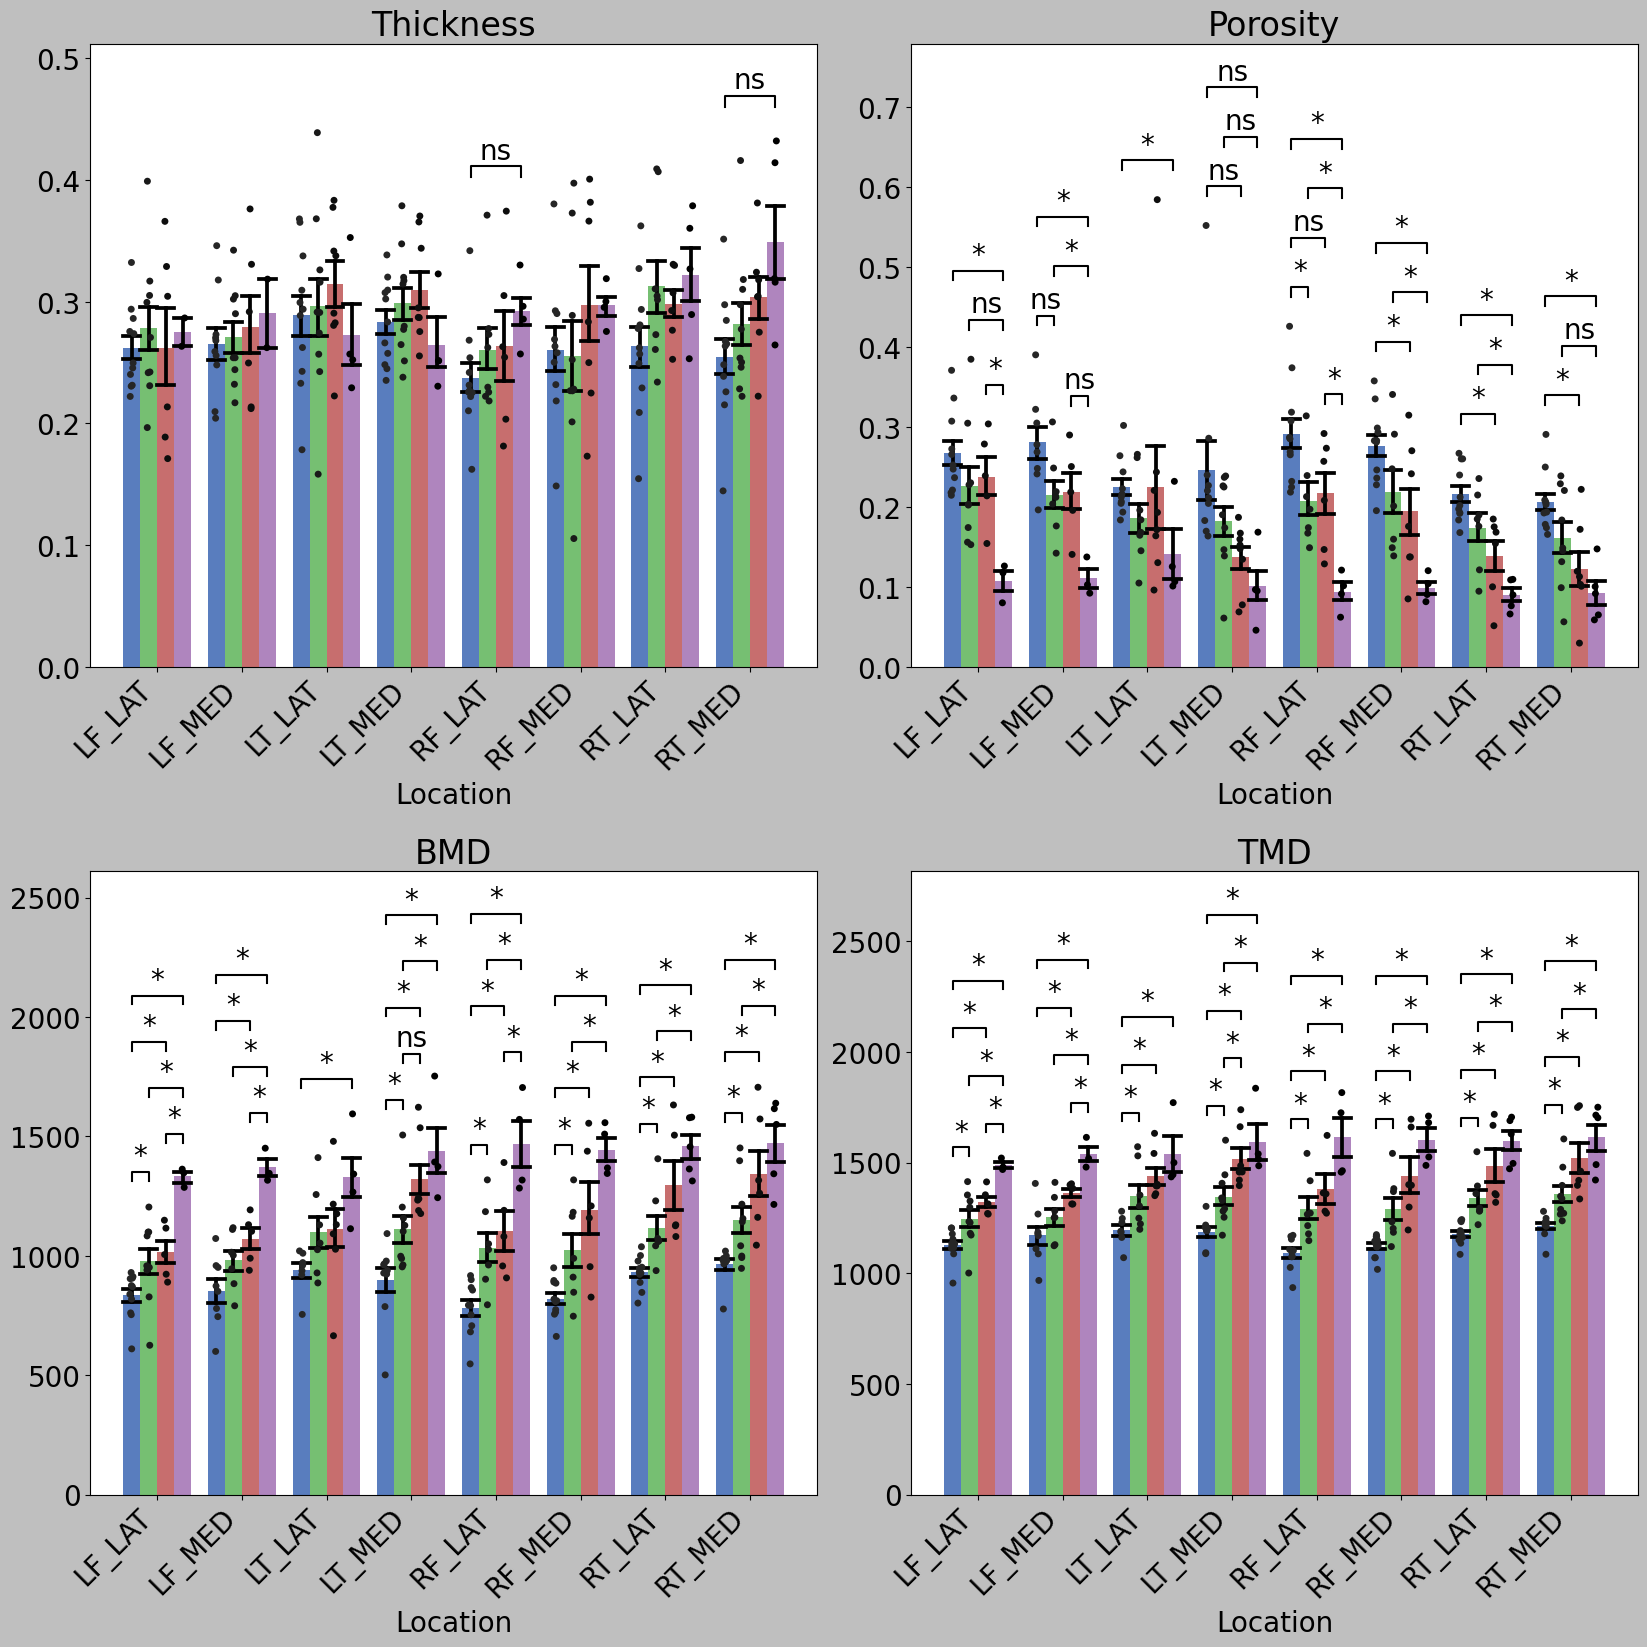

In [260]:
ITS_subplots('Thickness','Porosity','BMD','TMD')